<a href="https://colab.research.google.com/github/lucaspinheiro27/MACHINE_LEARNING_DATA_SCIENCE/blob/main/Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('tips.csv')
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
118,12.43,1.80,Female,No,Thur,Lunch,2
47,32.40,6.00,Male,No,Sun,Dinner,4
158,13.39,2.61,Female,No,Sun,Dinner,2
219,30.14,3.09,Female,Yes,Sat,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4


In [3]:
valores_dia = np.unique(df['day'])
valores_tamanho = np.unique(df['size'])
valores_tempo = np.unique(df['time'])
print(valores_dia)
print(valores_tamanho)
print(valores_tempo)

['Fri' 'Sat' 'Sun' 'Thur']
[1 2 3 4 5 6]
['Dinner' 'Lunch']


In [4]:
colunas_dummy = ['sex', 'smoker', 'time', 'day', 'size']
for coluna in colunas_dummy:
    valores_unicos = df[coluna].unique()
    for valor in valores_unicos:
        dummy_coluna = f"{coluna}_{valor}_dummy"
        df[dummy_coluna] = df.apply(lambda row: 1 if row[coluna] == valor else 0, axis=1)
df = df.drop(columns=colunas_dummy)

In [5]:
df['total_bill'] = df.sum(axis=1)
df['percentual_gorjeta'] = df['tip']/df['total_bill']
df_tratado = df.drop(columns=['tip', 'total_bill'])

In [6]:
mediana_gorjeta = df_tratado['percentual_gorjeta'].median()
df_tratado['class_gorjeta'] = df_tratado['percentual_gorjeta'].apply(lambda x: 1 if x > mediana_gorjeta else 0)
df_tratado

,sex_Female_dummy,sex_Male_dummy,smoker_No_dummy,smoker_Yes_dummy,time_Dinner_dummy,time_Lunch_dummy,day_Sun_dummy,day_Sat_dummy,day_Thur_dummy,day_Fri_dummy,size_2_dummy,size_3_dummy,size_4_dummy,size_1_dummy,size_6_dummy,size_5_dummy,percentual_gorjeta,class_gorjeta
0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0.043913,0
1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0.097647,0
2,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0.118604,1
3,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0.103470,0
4,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0.108735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0.148185,1
240,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0.058514,0
241,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0.067408,0
242,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0.071225,0


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt

In [8]:
df_tratado.columns

Index(['sex_Female_dummy', 'sex_Male_dummy', 'smoker_No_dummy',
       'smoker_Yes_dummy', 'time_Dinner_dummy', 'time_Lunch_dummy',
       'day_Sun_dummy', 'day_Sat_dummy', 'day_Thur_dummy', 'day_Fri_dummy',
       'size_2_dummy', 'size_3_dummy', 'size_4_dummy', 'size_1_dummy',
       'size_6_dummy', 'size_5_dummy', 'percentual_gorjeta', 'class_gorjeta'],
      dtype='object')

In [9]:
colunas = ['sex_Female_dummy', 'sex_Male_dummy', 'smoker_No_dummy',
       'smoker_Yes_dummy', 'time_Dinner_dummy', 'time_Lunch_dummy',
       'day_Sun_dummy', 'day_Sat_dummy', 'day_Thur_dummy', 'day_Fri_dummy',
       'size_2_dummy', 'size_3_dummy', 'size_4_dummy', 'size_1_dummy',
       'size_6_dummy', 'size_5_dummy', 'percentual_gorjeta']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df_tratado[colunas],
        df_tratado[['class_gorjeta']], test_size=0.5, random_state=42)

In [11]:
classificador = DecisionTreeClassifier()
classificador.fit(x_train, y_train)
y_pred = classificador.predict(x_test)
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))

Acurácia: 0.9918032786885246


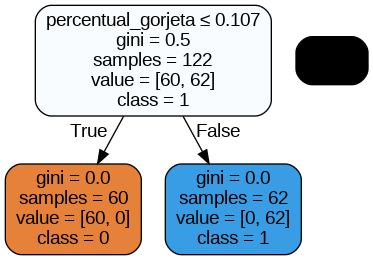

In [12]:
class_names = [str(i) for i in range(2)]
dot_data = StringIO()
export_graphviz(classificador, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = colunas, class_names=class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())


In [13]:
classificador = DecisionTreeClassifier(criterion='log_loss', min_samples_leaf=1, max_depth=1)
classificador.fit(x_train, y_train)
y_pred = classificador.predict(x_test)
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))

Acurácia: 0.9918032786885246


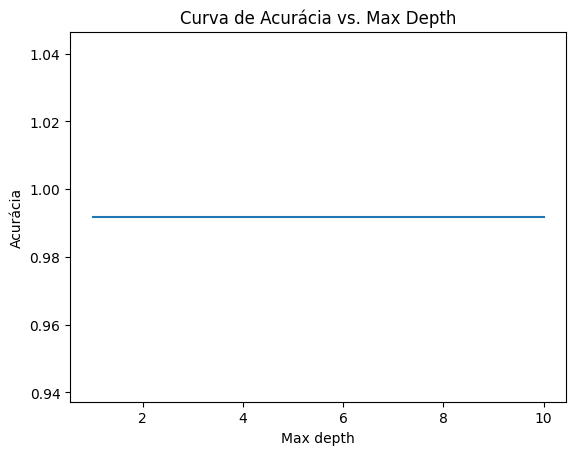

In [14]:
acuracias = []
for max_depth in range(1, 11):
  modelo = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
  modelo.fit(x_train, y_train)
  y_pred = modelo.predict(x_test)
  acuracia = accuracy_score(y_test, y_pred)
  acuracias.append(acuracia)

plt.plot(range(1, 11), acuracias)
plt.xlabel("Max depth")
plt.ylabel("Acurácia")
plt.title("Curva de Acurácia vs. Max Depth")
plt.show()

In [15]:
print("Max Depth | Accuracy")
print("-" * 20)
for i, accuracy in enumerate(acuracias):
    print(f"{i+1} | {accuracy:.4f}")

Max Depth | Accuracy
--------------------
1 | 0.9918
2 | 0.9918
3 | 0.9918
4 | 0.9918
5 | 0.9918
6 | 0.9918
7 | 0.9918
8 | 0.9918
9 | 0.9918
10 | 0.9918


In [16]:
classificador_random = RandomForestClassifier(oob_score=True, n_estimators=10, random_state=42)
classificador_random.fit(x_train, y_train.values.ravel())
y_pred = classificador_random.predict(x_test)
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Acurácia OOB:", classificador_random.oob_score_)

Acurácia: 0.9836065573770492
Acurácia OOB: 0.9672131147540983


In [63]:
lista_n_estimators = [10, 100, 1000]
criterios_list = ['gini', 'log_loss']
max_depth_list = range(1, 11)
resultados = []

In [64]:
for n_estimator in lista_n_estimators:
  for criterio in criterios_list:
    for max_depth in max_depth_list:
      modelo = RandomForestClassifier(n_estimators=n_estimator, criterion=criterio, max_depth=max_depth, random_state=42)
      modelo.fit(x_train, y_train.values.ravel())
      y_pred = modelo.predict(x_test)
      acuracia = accuracy_score(y_test, y_pred)
      resultados.append((n_estimator, criterio, max_depth, acuracia))

In [66]:
resultados_df = pd.DataFrame(resultados, columns=['n_estimators', 'criterio', 'max_depth', 'acuracia'])
resultados_df

,n_estimators,criterio,max_depth,acuracia
0,10,gini,1,0.991803
1,10,gini,2,0.991803
2,10,gini,3,0.959016
3,10,gini,4,0.991803
4,10,gini,5,0.983607
5,10,gini,6,0.991803
6,10,gini,7,0.991803
7,10,gini,8,0.983607
8,10,gini,9,0.983607
9,10,gini,10,0.983607


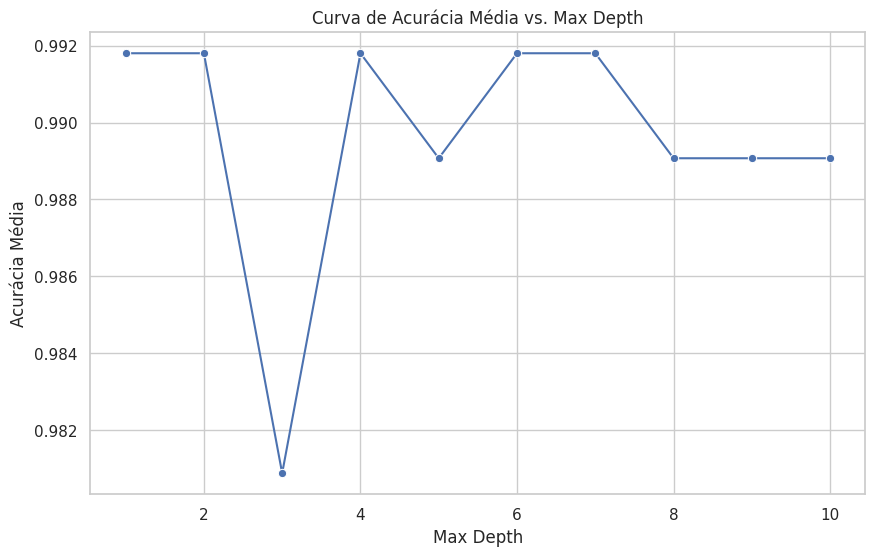

   max_depth  acuracia
0          1  0.991803
1          2  0.991803
2          3  0.980874
3          4  0.991803
4          5  0.989071
5          6  0.991803
6          7  0.991803
7          8  0.989071
8          9  0.989071
9         10  0.989071


In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
resultados_agrupados = resultados_df.groupby('max_depth')['acuracia'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=resultados_agrupados, x='max_depth', y='acuracia', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Acurácia Média')
plt.title('Curva de Acurácia Média vs. Max Depth')
plt.grid(True)
plt.show()
print(resultados_agrupados)

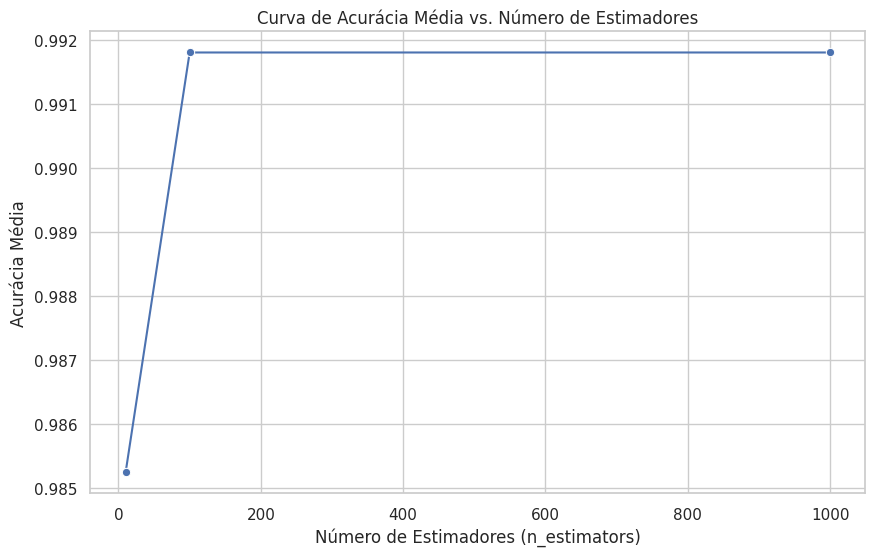

   n_estimators  acuracia
0            10  0.985246
1           100  0.991803
2          1000  0.991803


In [75]:
import matplotlib.pyplot as plt
resultados_agrupados = resultados_df.groupby('n_estimators')['acuracia'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=resultados_agrupados, x='n_estimators', y='acuracia', marker='o')
plt.xlabel('Número de Estimadores (n_estimators)')
plt.ylabel('Acurácia Média')
plt.title('Curva de Acurácia Média vs. Número de Estimadores')
plt.grid(True)
plt.show()

print(resultados_agrupados)

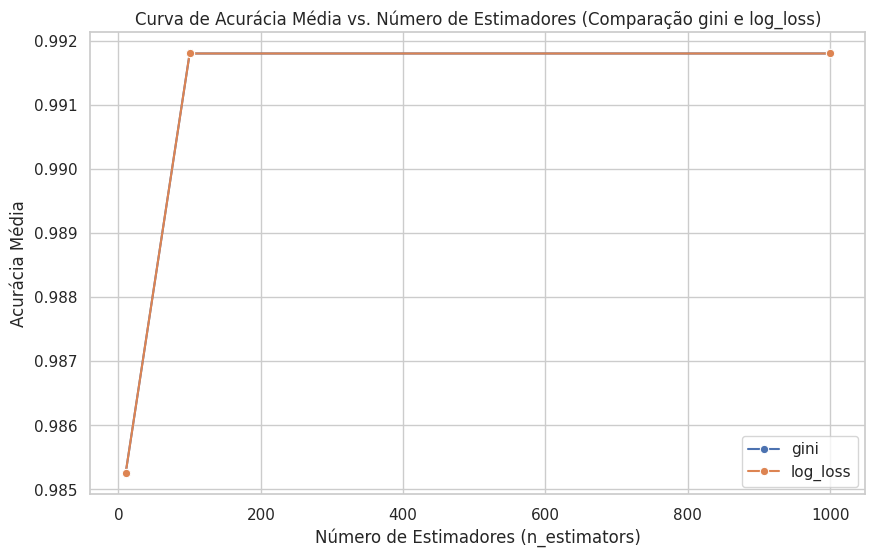

Resultados para critério 'gini':
   n_estimators  acuracia
0            10  0.985246
1           100  0.991803
2          1000  0.991803

Resultados para critério 'log_loss':
   n_estimators  acuracia
0            10  0.985246
1           100  0.991803
2          1000  0.991803


In [74]:
import matplotlib.pyplot as plt
resultados_gini = resultados_df[resultados_df['criterio'] == 'gini']
resultados_gini_agrupados = resultados_gini.groupby('n_estimators')['acuracia'].mean().reset_index()

resultados_log_loss = resultados_df[resultados_df['criterio'] == 'log_loss']
resultados_log_loss_agrupados = resultados_log_loss.groupby('n_estimators')['acuracia'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=resultados_gini_agrupados, x='n_estimators', y='acuracia', marker='o', label='gini')
sns.lineplot(data=resultados_log_loss_agrupados, x='n_estimators', y='acuracia', marker='o', label='log_loss')
plt.xlabel('Número de Estimadores (n_estimators)')
plt.ylabel('Acurácia Média')
plt.title('Curva de Acurácia Média vs. Número de Estimadores (Comparação gini e log_loss)')
plt.legend()
plt.grid(True)
plt.show()

print("Resultados para critério 'gini':")
print(resultados_gini_agrupados)
print("\nResultados para critério 'log_loss':")
print(resultados_log_loss_agrupados)

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [103]:
x_train, x_test, y_train, y_test = train_test_split(df_tratado[colunas],
        df_tratado[['class_gorjeta']], test_size=0.25, random_state=42)

In [104]:
# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)

In [106]:
model = LinearDiscriminantAnalysis(n_components=1)
x_train_nda = model.fit_transform(x_train, y_train.values.ravel())
y_pred = model.predict(x_test)
print("Acurácia:",metrics.accuracy_score(y_test, y_pred).round(2))
print(x_train_nda.shape)

Acurácia: 0.95
(183, 1)


In [113]:
model = LinearDiscriminantAnalysis(n_components=1, solver='svd') # Singular Value Decomposition: mais features, melhor
model.fit(x_train, y_train.values.ravel())
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))

model = LinearDiscriminantAnalysis(n_components=1, solver='lsqr', shrinkage=1) # mínimos quadrados, shrinkage tenta regularizar a covariância da amostra
model.fit(x_train, y_train.values.ravel())
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))

model = QuadraticDiscriminantAnalysis()
model.fit(x_train, y_train.values.ravel())
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9508196721311475
0.4918032786885246
0.45901639344262296


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
